In [9]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from jupyterthemes import jtplot
jtplot.style(theme='grade3')

# Data

## Read

In [10]:
df_train = pd.read_csv('../input/train.csv')
df_test = pd.read_csv('../input/test.csv')

In [12]:
df_train.info()
print('-'*40)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [97]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


## First look

In [35]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], 
            as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [37]:
df_train[['Sex', 'Survived']].groupby(['Sex'], 
            as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [38]:
df_train[['SibSp', 'Survived']].groupby(['SibSp'], 
            as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [40]:
df_train[['Parch', 'Survived']].groupby(['Parch'], 
            as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


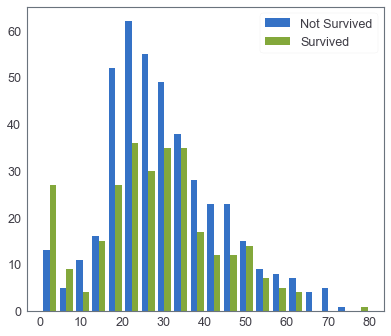

In [68]:
age0 = df_train[df_train['Survived']==0]['Age'].dropna().values
age1 = df_train[df_train['Survived']==1]['Age'].dropna().values
plt.hist([age0, age1], bins=20, label=['Not Survived', 'Survived'])
plt.grid(False)
plt.legend()

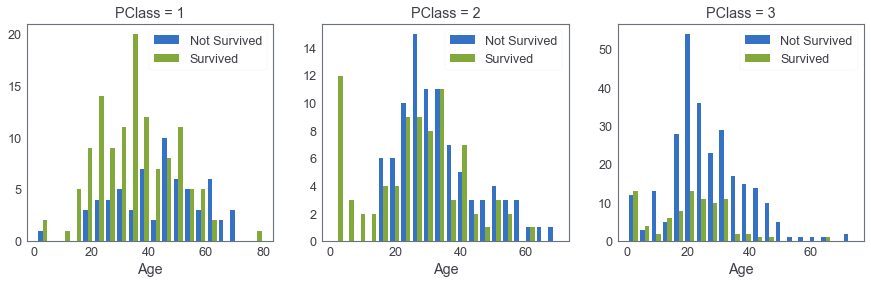

In [92]:
plt.figure(figsize=(15,4))
for i in range(3):
    sur0 = df_train[(df_train['Survived']==0) & 
                    (df_train['Pclass']==i+1)]['Age'].dropna().values
    sur1 = df_train[(df_train['Survived']==1) & 
                    (df_train['Pclass']==i+1)]['Age'].dropna().values
    plt.subplot(1,3,i+1)
    plt.hist([sur0, sur1], bins=20, label=['Not Survived', 'Survived'])
    plt.xlabel('Age')
    plt.grid(False)
    plt.title('PClass = {}'.format(i+1))
    plt.legend()

# Data preprocessing

## Drop columns: Ticket and Cabin

In [96]:
print('Before: ', df_train.shape, df_test.shape)
df_train.drop(['Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['Ticket', 'Cabin'], axis=1, inplace=True)
print('After: ', df_train.shape, df_test.shape)

Before:  (891, 12) (418, 11)
After:  (891, 10) (418, 9)


## Change Name to Title

In [100]:
for df in (df_train, df_test):
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=True)
pd.crosstab(df_train['Title'], df_train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [103]:
for df in (df_train, df_test):
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')
df_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().\
    sort_values(by='Survived', ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


In [104]:
title_mapping = {'Mrs': 1, 'Miss': 2, 'Master': 3, 'Rare': 4, 'Mr': 5}
for df in (df_train, df_test):
    df['Title'] = df['Title'].map(title_mapping)
    df['Title'] = df['Title'].fillna(0)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,5


In [105]:
for df in (df_train, df_test):
    df.drop(['Name'], axis=1)

## Change Sex to category

In [106]:
df_train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [107]:
sex_mapping = {'male': 0, 'female': 1}
for df in (df_train, df_test):
    df['Sex'] = df['Sex'].map(sex_mapping)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,5


## Filling out Age and create AgeBand

In [108]:
corr_matrix = df_train.corr()
print(corr_matrix)

             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005007 -0.035144 -0.042939  0.036847 -0.057527   
Survived       -0.005007  1.000000 -0.338481  0.543351 -0.077221 -0.035322   
Pclass         -0.035144 -0.338481  1.000000 -0.131900 -0.369226  0.083081   
Sex            -0.042939  0.543351 -0.131900  1.000000 -0.093254  0.114631   
Age             0.036847 -0.077221 -0.369226 -0.093254  1.000000 -0.308247   
SibSp          -0.057527 -0.035322  0.083081  0.114631 -0.308247  1.000000   
Parch          -0.001652  0.081629  0.018443  0.245489 -0.189119  0.414838   
Fare            0.012658  0.257307 -0.549500  0.182333  0.096067  0.159651   
Title           0.042384 -0.565716  0.137035 -0.944195  0.136456 -0.202135   

                Parch      Fare     Title  
PassengerId -0.001652  0.012658  0.042384  
Survived     0.081629  0.257307 -0.565716  
Pclass       0.018443 -0.549500  0.137035  
Sex          0.245489  0.182333 -0.944195  

In [121]:
df_train[['Pclass','Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


In [123]:
df_train[['SibSp','Survived']].groupby(['SibSp']).count()

,Survived
SibSp,
0,608
1,209
2,28
3,16
4,18
5,5
8,7


In [133]:
for df in (df_train, df_test):
    df['SibSp_cat'] = pd.cut(df['SibSp'], [0, 1, 2, np.inf], right=False, 
                               labels=[0, 1, 2]).astype(int)
df_train[['SibSp', 'SibSp_cat']]

,SibSp,SibSp_cat
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0
5,0,0
6,0,0
7,3,2
8,0,0
9,1,1


In [134]:
guess_age = np.zeros([3,3]) # Pclass, SibSp_cat

In [135]:
for iP in range(3):
    for iS in range(3):
        guess_age[iP][iS] = df_train[(df_train['Pclass']==iP+1) & 
            (df_train['SibSp_cat']==iS)]['Age'].dropna().median()
guess_age

array([[37. , 38. , 23.5],
       [30. , 29. , 24. ],
       [26. , 25. ,  9. ]])

In [139]:
for df in (df_train, df_test):
    for iP in range(3):
        for iS in range(3):
            df.loc[(df['Age'].isnull()) & (df['Pclass']==iP+1) & (df['SibSp_cat']==iS), 
                   'Age'] = guess_age[iP][iS]
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
Title          891 non-null int64
SibSp_cat      891 non-null int64
dtypes: float64(2), int64(8), object(2)
memory usage: 83.6+ KB


In [144]:
for df in (df_train, df_test):
    df.loc[(df['Age']<16), 'Age_cat'] = 0
    df.loc[(df['Age']>=16) & (df['Age']<32), 'Age_cat'] = 1
    df.loc[(df['Age']>=32) & (df['Age']<48), 'Age_cat'] = 2
    df.loc[(df['Age']>=48) & (df['Age']<64), 'Age_cat'] = 3
    df.loc[(df['Age']>=64), 'Age_cat'] = 4
df_train['Age_cat'] = df_train['Age_cat'].astype(int)
df_train[['Age','Age_cat']].groupby(['Age_cat'], as_index=False).mean()

,Age_cat,Age
0,0,6.749175
1,1,24.379707
2,2,38.048458
3,3,53.796053
4,4,68.884615


In [145]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,SibSp_cat,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,5,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,1,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,2,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,1,1,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,5,0,2


## Add family size

In [149]:
for df in (df_train, df_test):
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().\
    sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [154]:
df_train[['FamilySize','Survived']].groupby(['FamilySize'], as_index=False).count()

,FamilySize,Survived
0,1,537
1,2,161
2,3,102
3,4,29
4,5,15
5,6,22
6,7,12
7,8,6
8,11,7


In [156]:
for df in (df_train, df_test):
    df['FamilySize_cat'] = pd.cut(df['FamilySize'], [1,2,3,4,np.inf], 
                        labels=[0,1,2,3], right = False).astype(int)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,SibSp_cat,Age_cat,FamilySize,FamilySize_cat
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,5,1,1,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,1,1,2,2,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,2,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,1,1,2,2,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,5,0,2,1,0


## Filling Embarked

In [160]:
freq_port = df_train['Embarked'].dropna().mode()[0]
freq_port

'S'

In [162]:
for df in (df_train, df_test):
    df['Embarked'].fillna(freq_port, inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId       891 non-null int64
Survived          891 non-null int64
Pclass            891 non-null int64
Name              891 non-null object
Sex               891 non-null int64
Age               891 non-null float64
SibSp             891 non-null int64
Parch             891 non-null int64
Fare              891 non-null float64
Embarked          891 non-null object
Title             891 non-null int64
SibSp_cat         891 non-null int64
Age_cat           891 non-null int64
FamilySize        891 non-null int64
FamilySize_cat    891 non-null int64
dtypes: float64(2), int64(11), object(2)
memory usage: 104.5+ KB


In [165]:
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().\
    sort_values(by=['Survived'], ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [166]:
embarked_mapping = {'C': 0, 'Q': 1, 'S': 2}
for df in (df_train, df_test):
    df['Embarked_cat'] = df['Embarked'].map(embarked_mapping)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,SibSp_cat,Age_cat,FamilySize,FamilySize_cat,Embarked_cat
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,5,1,1,2,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,1,1,2,2,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,2,0,1,1,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,1,1,2,2,1,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,5,0,2,1,0,2


## Filling Fare

In [167]:
df_test['Fare'].fillna(df_test['Fare'].dropna().median(), inplace=True)

In [171]:
pd.qcut(df_train['Fare'], 4)

0       (-0.001, 7.91]
1      (31.0, 512.329]
2       (7.91, 14.454]
3      (31.0, 512.329]
4       (7.91, 14.454]
5       (7.91, 14.454]
6      (31.0, 512.329]
7       (14.454, 31.0]
8       (7.91, 14.454]
9       (14.454, 31.0]
10      (14.454, 31.0]
11      (14.454, 31.0]
12      (7.91, 14.454]
13     (31.0, 512.329]
14      (-0.001, 7.91]
15      (14.454, 31.0]
16      (14.454, 31.0]
17      (7.91, 14.454]
18      (14.454, 31.0]
19      (-0.001, 7.91]
20      (14.454, 31.0]
21      (7.91, 14.454]
22      (7.91, 14.454]
23     (31.0, 512.329]
24      (14.454, 31.0]
25     (31.0, 512.329]
26      (-0.001, 7.91]
27     (31.0, 512.329]
28      (-0.001, 7.91]
29      (-0.001, 7.91]
            ...       
861     (7.91, 14.454]
862     (14.454, 31.0]
863    (31.0, 512.329]
864     (7.91, 14.454]
865     (7.91, 14.454]
866     (7.91, 14.454]
867    (31.0, 512.329]
868     (7.91, 14.454]
869     (7.91, 14.454]
870     (-0.001, 7.91]
871    (31.0, 512.329]
872     (-0.001, 7.91]
873     (7.

In [173]:
for df in (df_train, df_test):
    df.loc[df['Fare'] <= 7.91, 'Fare_cat'] = 0
    df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare_cat'] = 1
    df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare_cat'] = 2
    df.loc[df['Fare'] > 31, 'Fare_cat'] = 3
    df['Fare_cat'] = df['Fare_cat'].astype(int)
df_train[['Fare', 'Fare_cat']].head()

,Fare,Fare_cat
0,7.2500,0
1,71.2833,3
2,7.9250,1
3,53.1000,3
4,8.0500,1


## Prepare training and test

In [176]:
X_train = df_train[['Pclass', 'Sex', 'Age_cat', 
                    'FamilySize_cat', 'Embarked_cat', 'Fare_cat', 'Title']]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Pclass            891 non-null int64
Sex               891 non-null int64
Age_cat           891 non-null int64
FamilySize_cat    891 non-null int64
Embarked_cat      891 non-null int64
Fare_cat          891 non-null int64
Title             891 non-null int64
dtypes: int64(7)
memory usage: 48.8 KB


In [177]:
X_test = df_test[['Pclass', 'Sex', 'Age_cat', 
                    'FamilySize_cat', 'Embarked_cat', 'Fare_cat', 'Title']]
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass            418 non-null int64
Sex               418 non-null int64
Age_cat           418 non-null float64
FamilySize_cat    418 non-null int64
Embarked_cat      418 non-null int64
Fare_cat          418 non-null int64
Title             418 non-null int64
dtypes: float64(1), int64(6)
memory usage: 22.9 KB


In [178]:
X_train = X_train.values
X_test = X_test.values

In [179]:
y_train = df_train['Survived'].values

# Models and Predictions

In [217]:
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

## Logistic regression

In [185]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc_logreg = accuracy_score(y_train, logreg.predict(X_train))
acc_logreg

0.8002244668911336

## Support Vector Machine

In [220]:
svc = SVC(probability=True)
svc.fit(X_train, y_train)
acc_svc = accuracy_score(y_train, svc.predict(X_train))
acc_svc

0.8361391694725028

## Decision Tree

In [190]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
acc_tree = accuracy_score(y_train, tree.predict(X_train))
acc_tree

0.8810325476992144

## Random Forest

In [191]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
acc_forest = accuracy_score(y_train, forest.predict(X_train))
acc_forest

0.877665544332211

## KNN

In [193]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
acc_knn = accuracy_score(y_train, knn.predict(X_train))
acc_knn

0.8439955106621774

## Voting

In [221]:
vote = VotingClassifier(
    estimators=[('logreg', logreg), ('svc', svc), 
                ('tree', tree), ('forest', forest), ('knn', knn)],
    voting='soft')
vote.fit(X_train, y_train)
acc_vote = accuracy_score(y_train, vote.predict(X_train))
acc_vote

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.867564534231201

## Model Comparisons

In [222]:
models = ['Logistic\nRegression', 'Support\nVector\nMachine', 'Decision\nTree', 
              'Random\nForest', 'KNN', 'Voting']
accs = [acc_logreg, acc_svc, acc_tree, acc_forest, acc_knn, acc_vote]
df_models = pd.DataFrame({
    'Model': models,
    'Accuracy': accs
})
df_models.sort_values(by='Accuracy', ascending=False)

,Accuracy,Model
2,0.881033,Decision\nTree
3,0.877666,Random\nForest
5,0.867565,Voting
4,0.843996,KNN
1,0.836139,Support\nVector\nMachine
0,0.800224,Logistic\nRegression


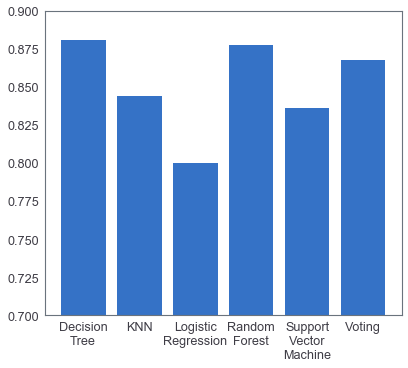

In [223]:
plt.bar(models, accs)
plt.ylim([0.7,0.9])
#plt.xticks(rotation=-30)
plt.grid(False)

# Submit

In [224]:
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": vote.predict(X_test)
    })
submission.to_csv('../input/submission_vote.csv', index=False)

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
